# Imports

In [2]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install dateutil
%pip install statsmodels
%pip install prophet


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement dateutil (from versions: none)
ERROR: No matching distribution found for dateutil

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the ke

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

# Data Loading

In [8]:
warehouse_df = pd.read_csv('data/Cloud Warehouse Compersion Chart.csv')
expense_df = pd.read_csv('data/Expense IIGF.csv')
may_df = pd.read_csv('data/May-2022.csv')
pl_df = pd.read_csv('data/P  L March 2021.csv')
sales_df = pd.read_csv('data/Sale Report.csv')
int_sales_df = pd.read_csv('data/International sale Report.csv')
amzn_sales_df = pd.read_csv('data/Amazon Sale Report.csv')

# Data Cleaning and Preprocessing

Amazon Sale Report

In [25]:
amzn_sales_df.head()

,index,Order_ID,Order_Date,Order_Status,Fulfillment_Type,Sales_Channel,Shipping_Service_Level,Product_Style,Product_SKU,Product_Category,...,Quantity,Currency,Sale_Amount,Shipping_City,Shipping_State,Shipping_Postal_Code,Shipping_Country,Promotion_IDs,Business_to_Business,Fulfilled_By
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [27]:
# Drop unnecessary columns
amzn_sales_df.drop(columns=['index'], errors='ignore', inplace=True)

# Converting these columns to required data type to preserve their format
amzn_sales_df['Order_Date'] = pd.to_datetime(amzn_sales_df['Order_Date'], errors='coerce')

amzn_sales_df[['Shipping_Postal_Code', 'Shipping_City', 'Shipping_State', 'Shipping_Country']] = amzn_sales_df[['Shipping_Postal_Code', 'Shipping_City', 'Shipping_State', 'Shipping_Country']].astype({'Shipping_Postal_Code': 'Int64'}).astype(str)

# Imputing values for missing data
amzn_sales_df.fillna({
    'Courier_Status': 'Unknown',
    'Currency': 'INR',
    'Sale_Amount': 0,
    'Shipping_City': 'Unknown',
    'Shipping_State': 'Unknown',
    'Shipping_Postal_Code': 'Unknown',
    'Shipping_Country': 'Unknown',
    'Promotion_IDs': 'None',
    'Fulfilled_By': 'Not Specified'
}, inplace=True)

In [28]:
amzn_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Order_ID                128975 non-null  object        
 1   Order_Date              73866 non-null   datetime64[ns]
 2   Order_Status            128975 non-null  object        
 3   Fulfillment_Type        128975 non-null  object        
 4   Sales_Channel           128975 non-null  object        
 5   Shipping_Service_Level  128975 non-null  object        
 6   Product_Style           128975 non-null  object        
 7   Product_SKU             128975 non-null  object        
 8   Product_Category        128975 non-null  object        
 9   Product_Size            128975 non-null  object        
 10  Amazon_Standard_ID      128975 non-null  object        
 11  Courier_Status          128975 non-null  object        
 12  Quantity                128975

In [29]:
sns.set_style("whitegrid")

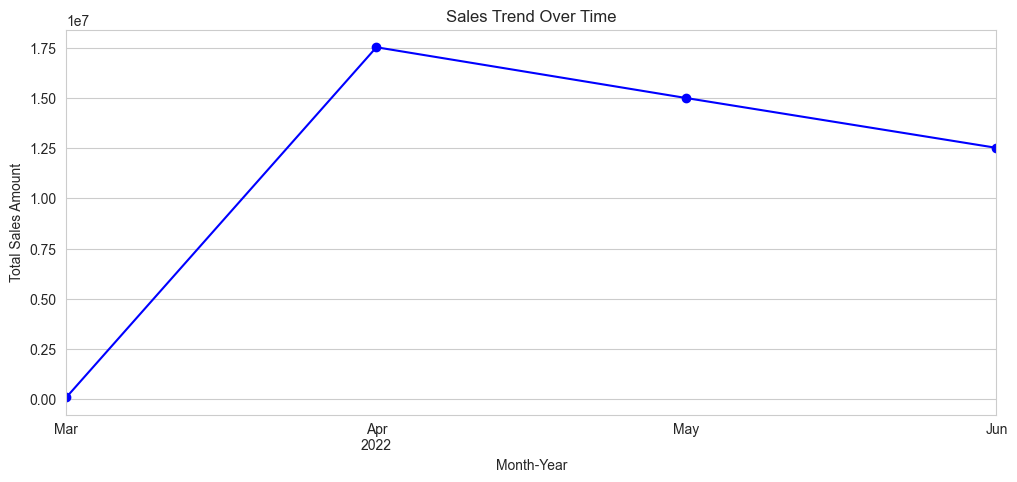

In [31]:
plt.figure(figsize=(12, 5))
amzn_sales_df.groupby(amzn_sales_df['Order_Date'].dt.to_period("M"))['Sale_Amount'].sum().plot(kind='line', marker='o', color='b')
plt.title("Sales Trend Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

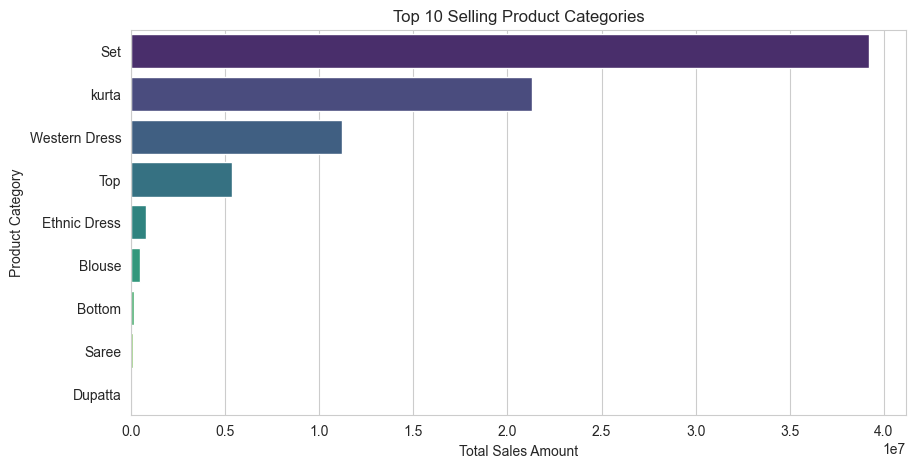

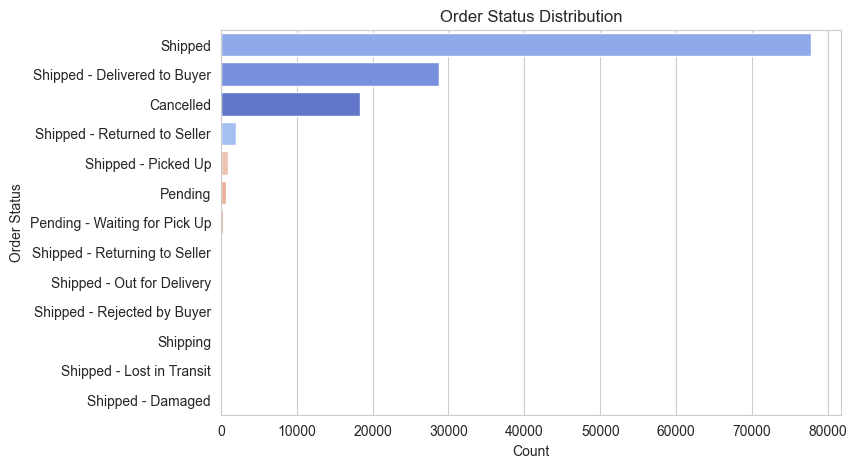

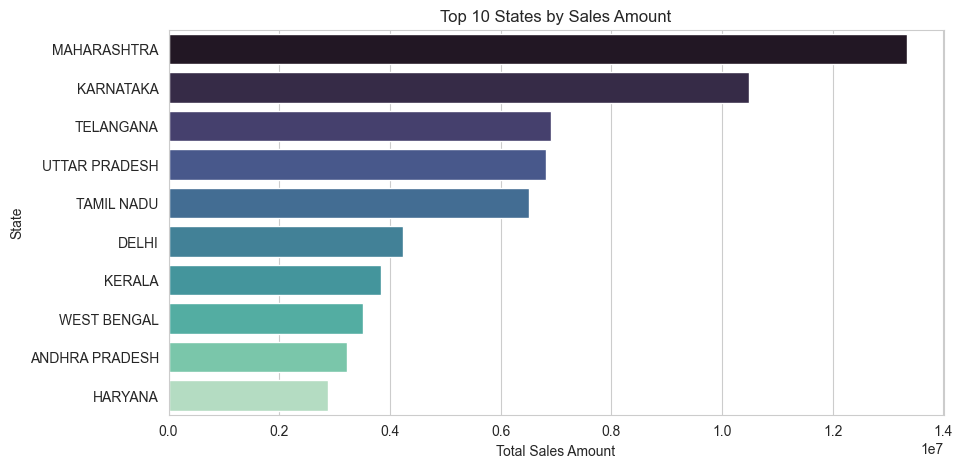

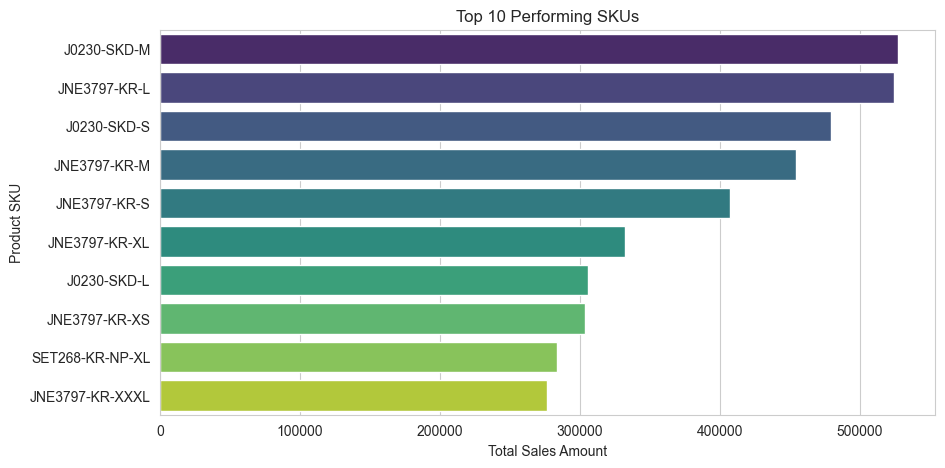

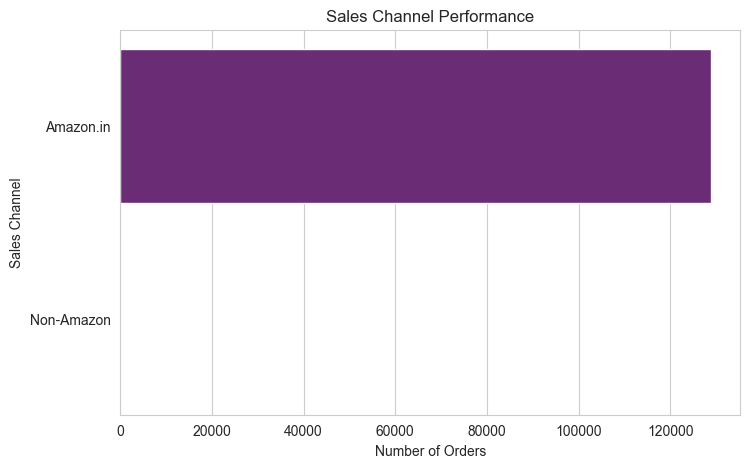

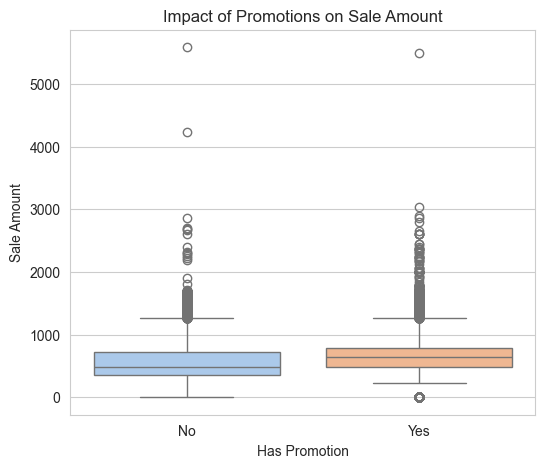

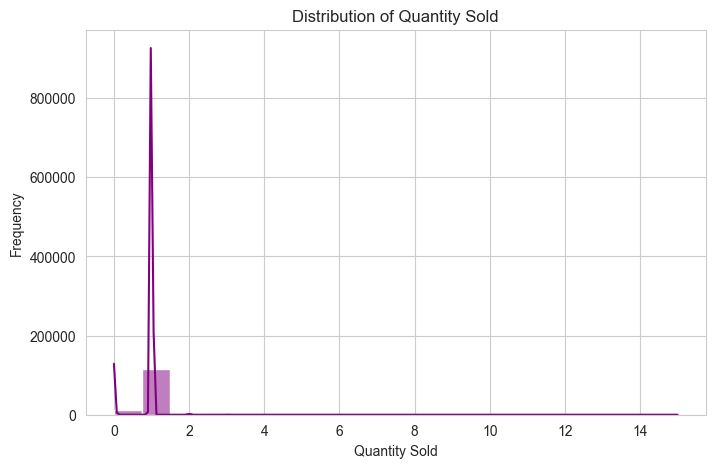

In [34]:
# Top 10 Selling Product Categories
plt.figure(figsize=(10, 5))
top_categories = amzn_sales_df.groupby('Product_Category')['Sale_Amount'].sum().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, hue=top_categories.index, palette='viridis', legend=False)
plt.title("Top 10 Selling Product Categories")
plt.xlabel("Total Sales Amount")
plt.ylabel("Product Category")
plt.show()

# Order Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(y=amzn_sales_df['Order_Status'], hue=amzn_sales_df['Order_Status'], order=amzn_sales_df['Order_Status'].value_counts().index, palette='coolwarm', legend=False)
plt.title("Order Status Distribution")
plt.xlabel("Count")
plt.ylabel("Order Status")
plt.show()

# Top 10 States by Sales Amount
plt.figure(figsize=(10, 5))
top_states = amzn_sales_df.groupby('Shipping_State')['Sale_Amount'].sum().nlargest(10)
sns.barplot(x=top_states.values, y=top_states.index, hue=top_states.index, palette='mako', legend=False)
plt.title("Top 10 States by Sales Amount")
plt.xlabel("Total Sales Amount")
plt.ylabel("State")
plt.show()

# Top 10 Performing SKUs
plt.figure(figsize=(10, 5))
top_skus = amzn_sales_df.groupby('Product_SKU')['Sale_Amount'].sum().nlargest(10)
sns.barplot(x=top_skus.values, y=top_skus.index, hue=top_skus.index, palette='viridis', legend=False)
plt.title("Top 10 Performing SKUs")
plt.xlabel("Total Sales Amount")
plt.ylabel("Product SKU")
plt.show()

# Sales Channel Performance
plt.figure(figsize=(8, 5))
sns.countplot(y=amzn_sales_df['Sales_Channel'], hue=amzn_sales_df['Sales_Channel'], order=amzn_sales_df['Sales_Channel'].value_counts().index, palette='magma', legend=False)
plt.title("Sales Channel Performance")
plt.xlabel("Number of Orders")
plt.ylabel("Sales Channel")
plt.show()

# Impact of Promotions on Sale Amount
amzn_sales_df['Has_Promotion'] = amzn_sales_df['Promotion_IDs'].apply(lambda x: 'Yes' if x != 'None' else 'No')
plt.figure(figsize=(6, 5))
sns.boxplot(x='Has_Promotion', y='Sale_Amount', data=amzn_sales_df, hue='Has_Promotion', palette='pastel', legend=False)
plt.title("Impact of Promotions on Sale Amount")
plt.xlabel("Has Promotion")
plt.ylabel("Sale Amount")
plt.show()

# Quantity Sold Distribution
plt.figure(figsize=(8, 5))
sns.histplot(amzn_sales_df['Quantity'], bins=20, kde=True, color='purple')
plt.title("Distribution of Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Frequency")
plt.show()


Cloud Warehouse Comparison Chart

In [5]:
warehouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   50 non-null     int64 
 1   Shiprocket_Performance  21 non-null     object
 2   Unnamed: 1              41 non-null     object
 3   INCREFF_Performance     28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [35]:
warehouse_df

,index,Shiprocket_Performance,Unnamed: 1,INCREFF_Performance
0,0,Heads,Price (Per Unit),Price (Per Unit)
1,1,Inbound (Fresh Stock and RTO),₹4.00,4
2,2,Outbound,₹7.00,11
3,3,Storage Fee/Cft,₹25.00,Rs 0.15/- Per Day
4,4,Customer Return with Detailed QC,₹6.00,15.5
5,5,(A) SCOPE OF WORK and STANDARD OPERATING PROCE...,NaN,NaN
6,6,Inward,Unloading,• Boxes counted and weighed. Data captured in ...
7,7,NaN,Validation,• GRN will be initiated against a valid PO doc...
8,8,NaN,QC,• No QC to be done (Outer Visual Inspection an...
9,9,NaN,GRN,• Scanning (Goods will have scannable EAN cod...


Expense IIGF

In [47]:
expense_df

,index,Received_Amount,Unnamed: 1,Expense_Amount,Unnamed: 3
0,0,Particular,Amount,Particular,Amount
1,1,6/19/2022,1000,Large Bag,380
2,2,6/20/2022,1500,"Stationary(Soft Pin, Paper pin for Dupatta, Fe...",170
3,3,6/22/2022,500,OLA,839
4,4,6/23/2022,2000,Auto Rent,520
5,5,NaN,NaN,TT Fine,500
6,6,NaN,NaN,Bhushan Hotel,2506
7,7,NaN,NaN,Food,1290
8,8,NaN,NaN,Expomart Labour Charge,200
9,9,NaN,NaN,Choclate,400


In [55]:
# Cleaning
expense_df_cleaned = expense_df.iloc[1:].reset_index(drop=True)
expense_df_cleaned.columns = ["Index", "Date_Received", "Received_Amount", "Expense_Item", "Expense_Amount"]
expense_df_cleaned.drop(columns=["Index"], inplace=True)
expense_df_cleaned = expense_df_cleaned.drop(columns=["Date_Received"], errors="ignore")
expense_df_cleaned["Received_Amount"] = pd.to_numeric(expense_df_cleaned["Received_Amount"], errors='coerce')
expense_df_cleaned["Expense_Amount"] = pd.to_numeric(expense_df_cleaned["Expense_Amount"], errors='coerce')

# Imputing missing values
expense_df_cleaned['Received_Amount'].fillna(0, inplace=True)
expense_df_cleaned['Expense_Amount'].fillna(0, inplace=True)


# Drop last row as it contains total values
expense_df_cleaned.drop(expense_df_cleaned.tail(3).index, inplace=True)


/var/folders/nr/khgwm2yx29l9jhcvccmdjmn8q2_1zk/T/ipykernel_42514/2445936340.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  expense_df_cleaned['Received_Amount'].fillna(0, inplace=True)
/var/folders/nr/khgwm2yx29l9jhcvccmdjmn8q2_1zk/T/ipykernel_42514/2445936340.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [56]:
expense_df_cleaned

,Received_Amount,Expense_Item,Expense_Amount
0,1000.0,Large Bag,380
1,1500.0,"Stationary(Soft Pin, Paper pin for Dupatta, Fe...",170
2,500.0,OLA,839
3,2000.0,Auto Rent,520
4,0.0,TT Fine,500
5,0.0,Bhushan Hotel,2506
6,0.0,Food,1290
7,0.0,Expomart Labour Charge,200
8,0.0,Choclate,400
9,0.0,Bhushan Cash,800


In [57]:
# Total Received Amount
total_received_amount = expense_df_cleaned['Received_Amount'].sum()
total_expense_amount = expense_df_cleaned['Expense_Amount'].sum()
pending_amount = total_received_amount - total_expense_amount

print("Total Received Amount:", total_received_amount)
print("Total Expense Amount:", total_expense_amount)
print("Pending Amount:", pending_amount)

Total Received Amount: 5000.0
Total Expense Amount: 8095
Pending Amount: -3095.0


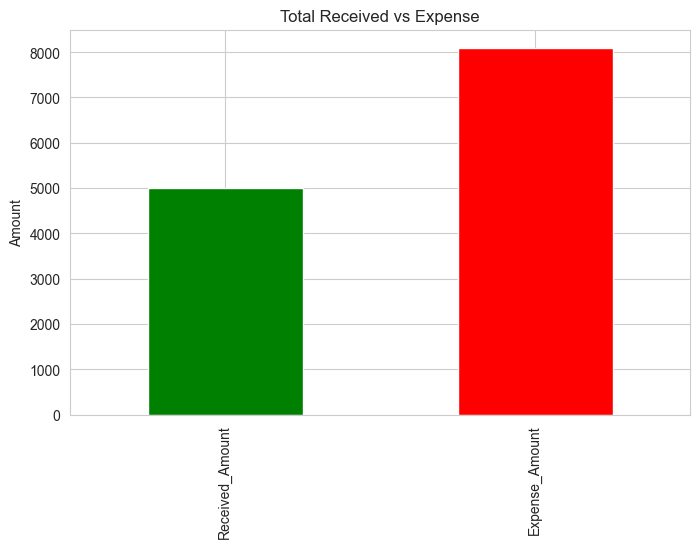

In [58]:
plt.figure(figsize=(8, 5))
expense_df_cleaned[['Received_Amount', 'Expense_Amount']].sum().plot(kind='bar', color=['green', 'red'])
plt.title("Total Received vs Expense")
plt.ylabel("Amount")
plt.show()

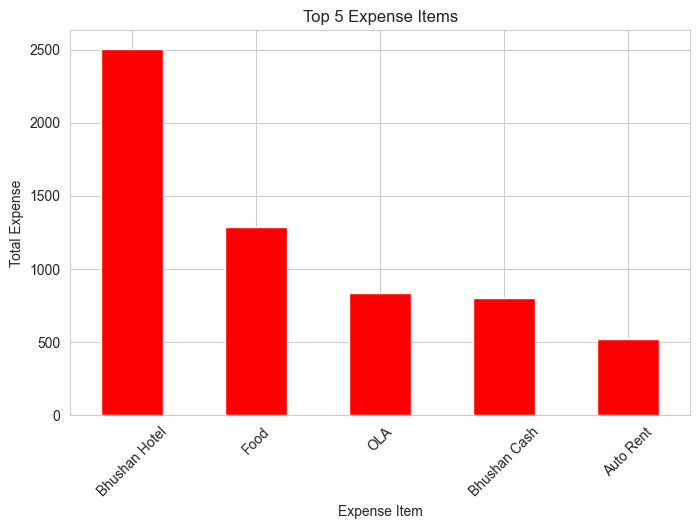

In [59]:
top_expenses = expense_df_cleaned.groupby("Expense_Item")["Expense_Amount"].sum().nlargest(5)
plt.figure(figsize=(8, 5))
top_expenses.plot(kind='bar', color='red')
plt.title("Top 5 Expense Items")
plt.ylabel("Total Expense")
plt.xlabel("Expense Item")
plt.xticks(rotation=45)
plt.show()


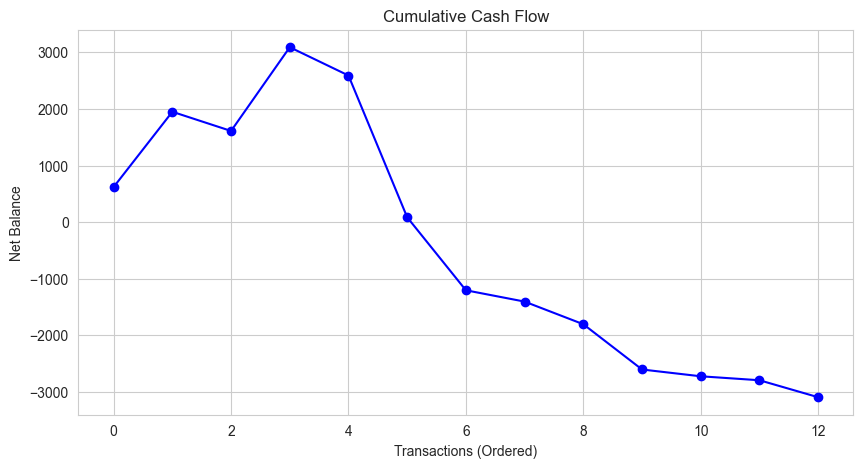

In [61]:
expense_df_cleaned["Net Flow"] = expense_df_cleaned["Received_Amount"] - expense_df_cleaned["Expense_Amount"]
expense_df_cleaned["Cumulative Flow"] = expense_df_cleaned["Net Flow"].cumsum()
plt.figure(figsize=(10, 5))
plt.plot(expense_df_cleaned["Cumulative Flow"], marker='o', linestyle='-', color='blue')
plt.title("Cumulative Cash Flow")
plt.ylabel("Net Balance")
plt.xlabel("Transactions (Ordered)")
plt.show()

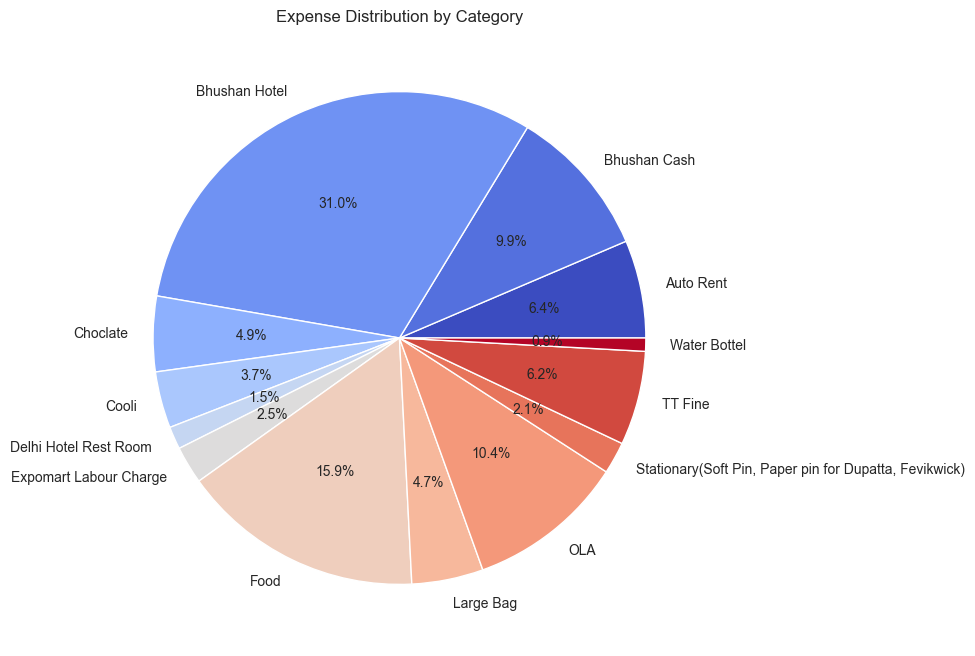

In [63]:
plt.figure(figsize=(8, 8))
expense_df_cleaned.groupby("Expense_Item")["Expense_Amount"].sum().plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm')
plt.title("Expense Distribution by Category")
plt.ylabel("")
plt.show()

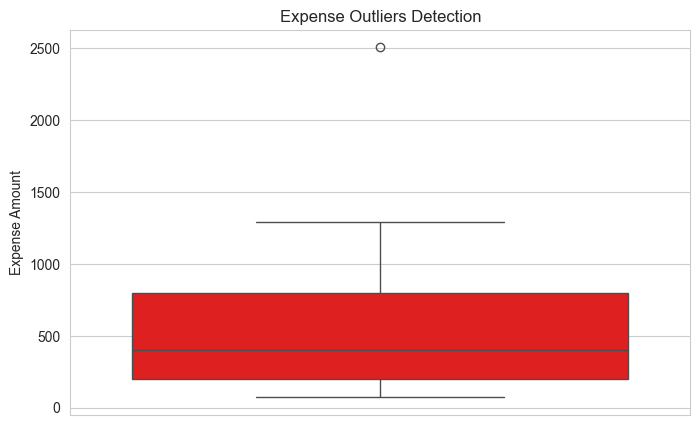

In [64]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=expense_df_cleaned["Expense_Amount"], color='red')
plt.title("Expense Outliers Detection")
plt.ylabel("Expense Amount")
plt.show()

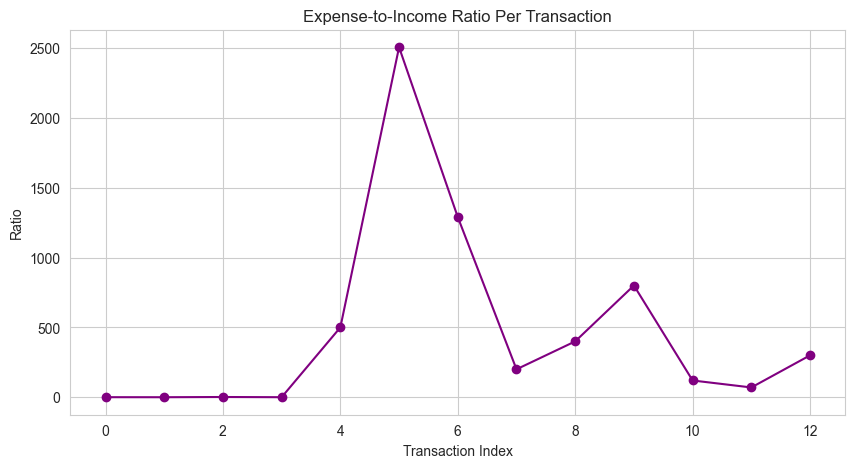

In [65]:
expense_df_cleaned['Expense_to_Income'] = expense_df_cleaned['Expense_Amount'] / (expense_df_cleaned['Received_Amount'] + 1)
plt.figure(figsize=(10, 5))
plt.plot(expense_df_cleaned['Expense_to_Income'], marker='o', linestyle='-', color='purple')
plt.title("Expense-to-Income Ratio Per Transaction")
plt.ylabel("Ratio")
plt.xlabel("Transaction Index")
plt.show()

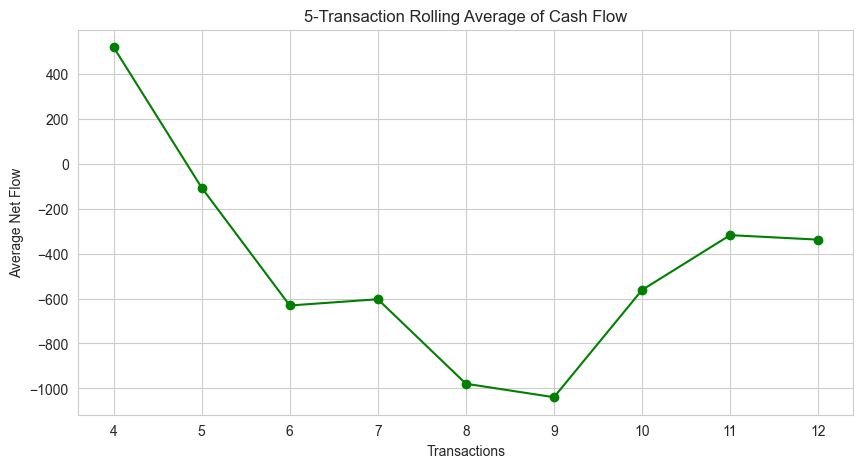

In [66]:
expense_df_cleaned['Rolling_Cash_Flow'] = expense_df_cleaned['Net Flow'].rolling(window=5).mean()
plt.figure(figsize=(10, 5))
plt.plot(expense_df_cleaned['Rolling_Cash_Flow'], marker='o', linestyle='-', color='green')
plt.title("5-Transaction Rolling Average of Cash Flow")
plt.ylabel("Average Net Flow")
plt.xlabel("Transactions")
plt.show()

International Sale Report

In [290]:
int_sales_df = pd.read_csv('data/International sale Report.csv')

In [271]:
int_sales_df.head()

,index,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
0,0,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1,616.56,617
1,1,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1,616.56,617
2,2,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1,616.56,617
3,3,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1,616.56,617
4,4,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1,616.56,617


In [214]:
def is_date(string):
    try:
        if pd.isna(string):
            return False
        parse(str(string))
        return True
    except (ValueError, TypeError):
        return False

# Counting date and non-date values
date_count = int_sales_df['Sale_Date'].apply(is_date).sum()
non_date_count = len(int_sales_df) - date_count

print(f"Number of date values: {date_count}")
print(f"Number of non-date values: {non_date_count}")
print("Length of the DataFrame:", len(int_sales_df))

Number of date values: 18643
Number of non-date values: 18789
Length of the DataFrame: 37432


In [9]:
# Reading each section of the dataset seperately

sales_data = pd.read_csv('data/International sale Report.csv', header=None, nrows=18664, skiprows=1)
sales_data.columns = ['index', 'Sale_Date', 'Sale_Month', 'Customer_Name', 'Product_Style', 'Product_SKU', 'Product_Size', 'Quantity_Purchased', 'Price_per_Unit', 'Gross_Amount']
sales_data = sales_data.dropna(axis=1, how='all')

sku_data = pd.read_csv('data/International sale Report.csv', header=None, skiprows=18637, nrows=22, usecols=range(1,2))
sku_data.columns = ['SKU']
sku_data = sku_data.dropna(axis=1, how='all')

style_stock_data = pd.read_csv('data/International sale Report.csv', header=None, skiprows=18662, nrows=1014, usecols=range(1,3))
style_stock_data.columns = ['Style', 'Stock']
style_stock_data = style_stock_data.dropna(axis=1, how='all')

detailed_sales_data = pd.read_csv('data/International sale Report.csv', header=None, skiprows=19678, usecols=range(1,10))
detailed_sales_data.columns = ['CUSTOMER', 'DATE', 'Months', 'Style', 'SKU', 'PCS', 'RATE', 'GROSS AMT', 'Stock']
detailed_sales_data = detailed_sales_data.dropna(axis=1, how='all')

In [10]:
sales_data

,index,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
0,0,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.0,616.56,617.0
1,1,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.0,616.56,617.0
2,2,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.0,616.56,617.0
3,3,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.0,616.56,617.0
4,4,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.0,616.56,617.0
...,...,...,...,...,...,...,...,...,...,...
18659,18659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18660,18660,Style,Stock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18661,18661,MEN5004,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18662,18662,MEN5009,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
sku_data

,SKU
0,JNE3826
1,JNE3827
2,JNE3828
3,JNE3853
4,JNE3855
5,JNE3858
6,JNE3829
7,JNE3830
8,JNE3849
9,JNE3852


In [208]:
style_stock_data

,Style,Stock
0,MEN5004,43
1,MEN5009,55
2,MEN5011,53
3,MEN5025,34
4,MEN5015,119
...,...,...
1009,J0419,313
1010,JNE3905,299
1011,23-Jan,0
1012,J0391,270


In [209]:
detailed_sales_data

,CUSTOMER,DATE,Months,Style,SKU,PCS,RATE,GROSS AMT,Stock
0,REVATHY LOGANATHAN,6/5/2021,21-Jun,MEN5004,MEN5004-KR-XL,1,616.56,617,4
1,REVATHY LOGANATHAN,6/5/2021,21-Jun,MEN5004,MEN5004-KR-XXL,1,616.56,617,6
2,REVATHY LOGANATHAN,6/5/2021,21-Jun,MEN5009,MEN5009-KR-L,1,616.56,617,6
3,REVATHY LOGANATHAN,6/5/2021,21-Jun,MEN5011,MEN5011-KR-L,1,616.56,617,11
4,REVATHY LOGANATHAN,6/5/2021,21-Jun,MEN5025,MEN5025-KR-L,1,649.03,649,6
...,...,...,...,...,...,...,...,...,...
17750,AVIN,3/31/2022,22-Mar,PJNE3423,PJNE3423-KR-4XL,1,537.50,538,4
17751,AVIN,3/31/2022,22-Mar,PJNE3404,PJNE3404-KR-4XL,1,500.00,500,5
17752,AVIN,3/31/2022,22-Mar,PJNE3423,PJNE3423-KR-4XL,1,537.50,538,4
17753,AVIN,3/31/2022,22-Mar,SET290,SET290-KR-DPT-M,1,812.50,812,7


In [293]:
ssales_data = sales_data.copy()

In [347]:
sales_data=ssales_data.copy()

In [349]:
sales_data

,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
0,05-06-2021,2021-06,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.0,616.56,617.0
1,05-06-2021,2021-06,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.0,616.56,617.0
2,05-06-2021,2021-06,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.0,616.56,617.0
3,05-06-2021,2021-06,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.0,616.56,617.0
4,05-06-2021,2021-06,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.0,616.56,617.0
...,...,...,...,...,...,...,...,...,...
18630,30-04-2022,2022-04,Rino Sandaran,J0280,NaN,S,1.0,1812.50,1812.5
18631,30-04-2022,2022-04,Rino Sandaran,SET350,NaN,M,1.0,1512.50,1512.5
18632,30-04-2022,2022-04,Rino Sandaran,SET350,NaN,L,1.0,1512.50,1512.5
18633,30-04-2022,2022-04,Rino Sandaran,J0242,NaN,XXXL,1.0,1312.50,1312.5


In [11]:
# Handling missing values for sales data
sales_data.drop(columns=['index', 'Category'], errors='ignore', inplace=True)
sales_data['Sale_Date'] = pd.to_datetime(sales_data['Sale_Date'], format='%m/%d/%Y', errors='coerce').dt.strftime('%d-%m-%Y')
sales_data['Sale_Month'] = pd.to_datetime(sales_data['Sale_Month'], format='%y-%b', errors='coerce').dt.strftime('%Y-%m')
numeric_cols = ['Quantity_Purchased', 'Gross_Amount', 'Price_per_Unit']
sales_data[numeric_cols] = sales_data[numeric_cols].apply(pd.to_numeric, errors='coerce')
sales_data['Customer_Name'] = sales_data['Customer_Name'].str.replace('MR.', 'MR ', regex=False).str.strip()
sales_data.dropna(subset=['Sale_Month', 'Product_Size', 'Product_Style', 'Customer_Name', 'Quantity_Purchased', 'Price_per_Unit', 'Gross_Amount'], inplace=True) # Dropping rows with missing values since theyt are less than 1% of the data
sales_data['Product_SKU'].fillna('Unknown')

# Handling missing values for style-stock data 
style_stock_data['Stock'] = pd.to_numeric(style_stock_data['Stock'], errors='coerce').fillna(0)

# Handling missing values for detailed sales data
detailed_numeric_cols = ['PCS', 'RATE', 'GROSS AMT']
detailed_sales_data[detailed_numeric_cols] = detailed_sales_data[detailed_numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

In [12]:
# Sales Trend Analysis
total_sales = sales_data['Quantity_Purchased'].sum()
daily_sales = sales_data.groupby('Sale_Date')['Quantity_Purchased'].sum()
monthly_sales = sales_data.groupby('Sale_Month')['Quantity_Purchased'].sum()

# Top Selling Products
top_products = sales_data.groupby('Product_SKU')['Quantity_Purchased'].sum().sort_values().head(10)

# Customer Analysis
top_customers = sales_data.groupby('Customer_Name')['Gross_Amount'].sum().sort_values().head(5)

# Product Category Performance
sales_data['Category'] = sales_data['Product_SKU']
category_sales = sales_data.groupby('Category')['Quantity_Purchased'].sum().sort_values()

# Size Distribution
size_distribution = sales_data.groupby('Product_Size')['Quantity_Purchased'].sum().sort_values()

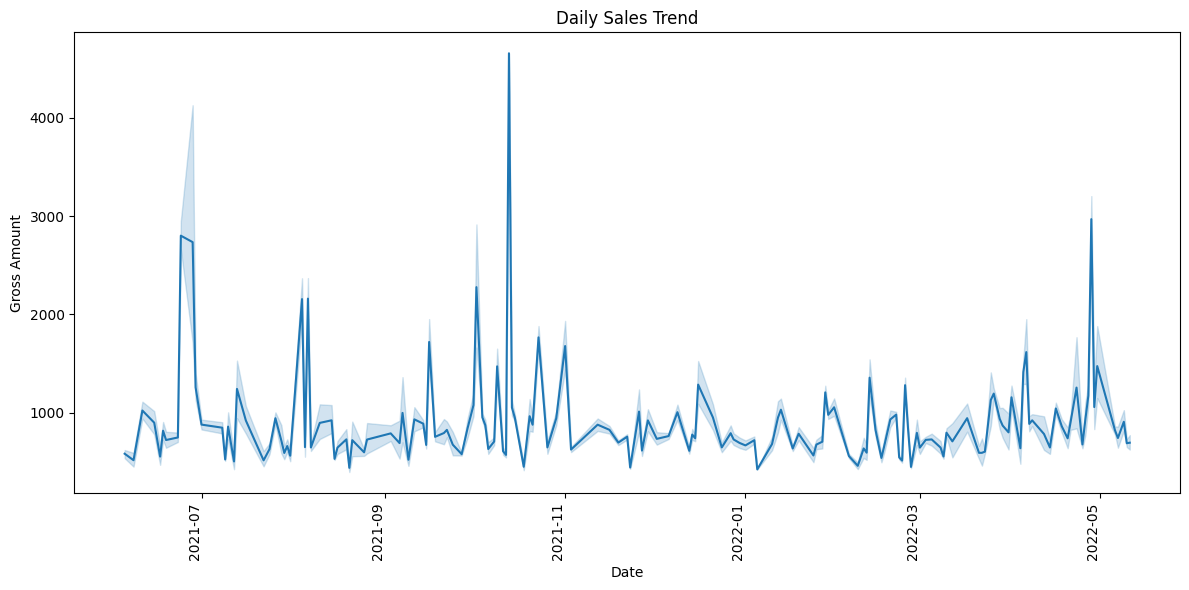

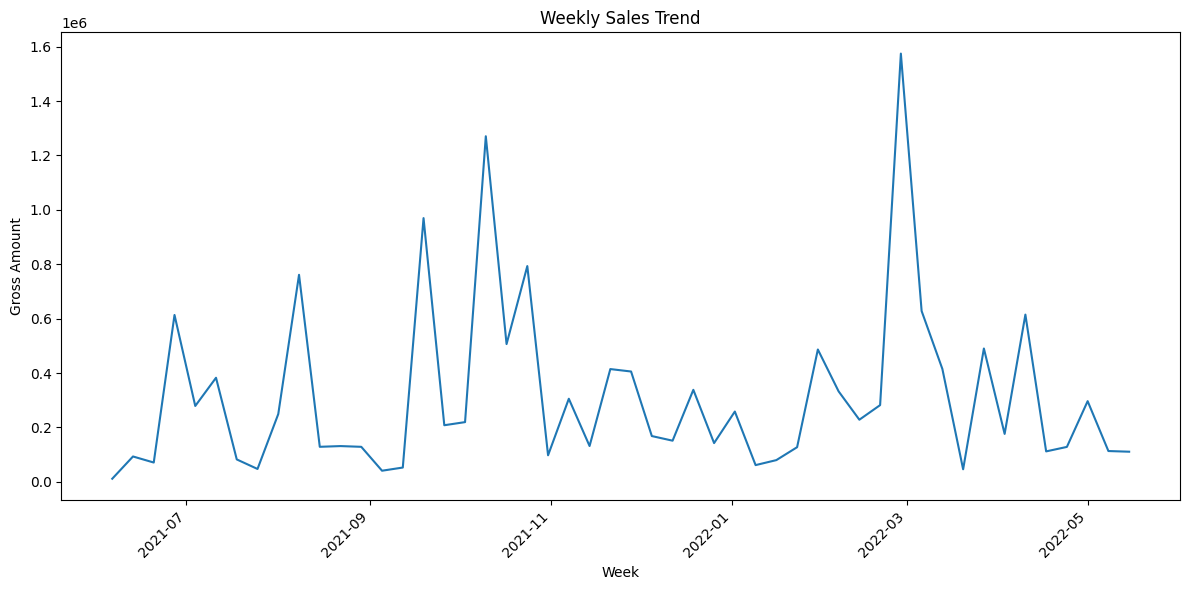

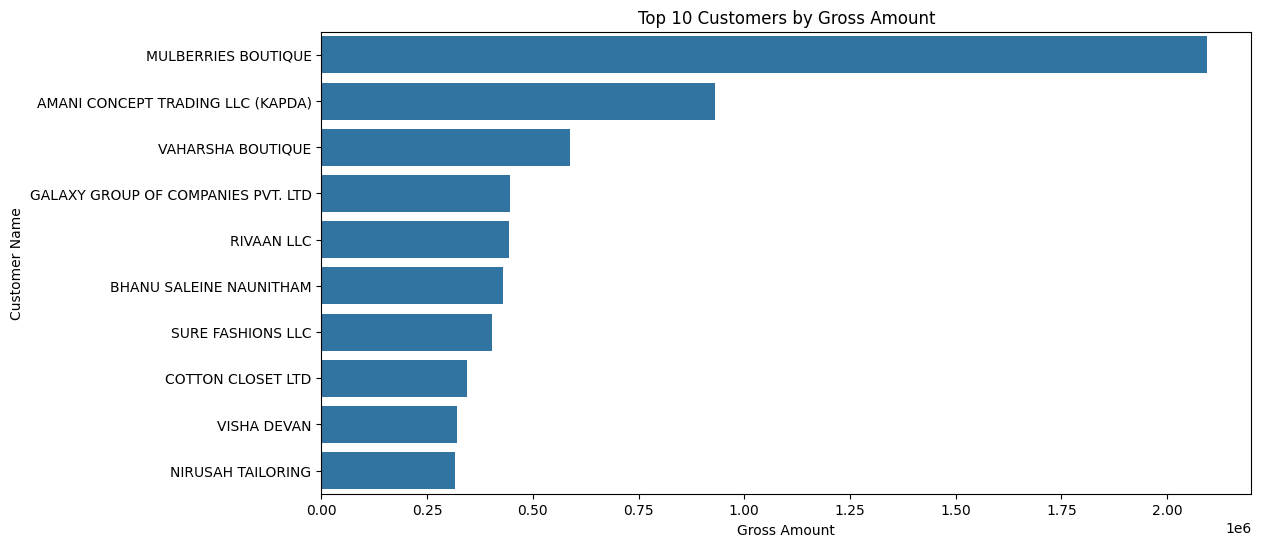

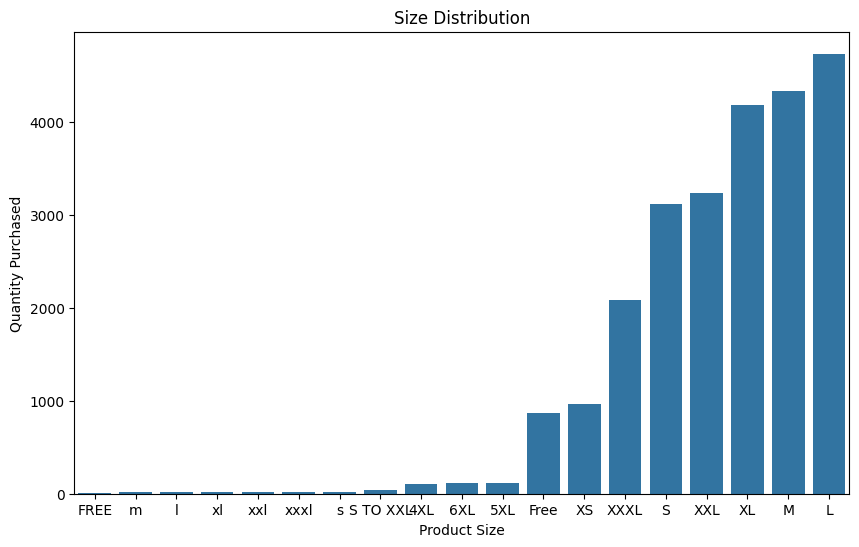

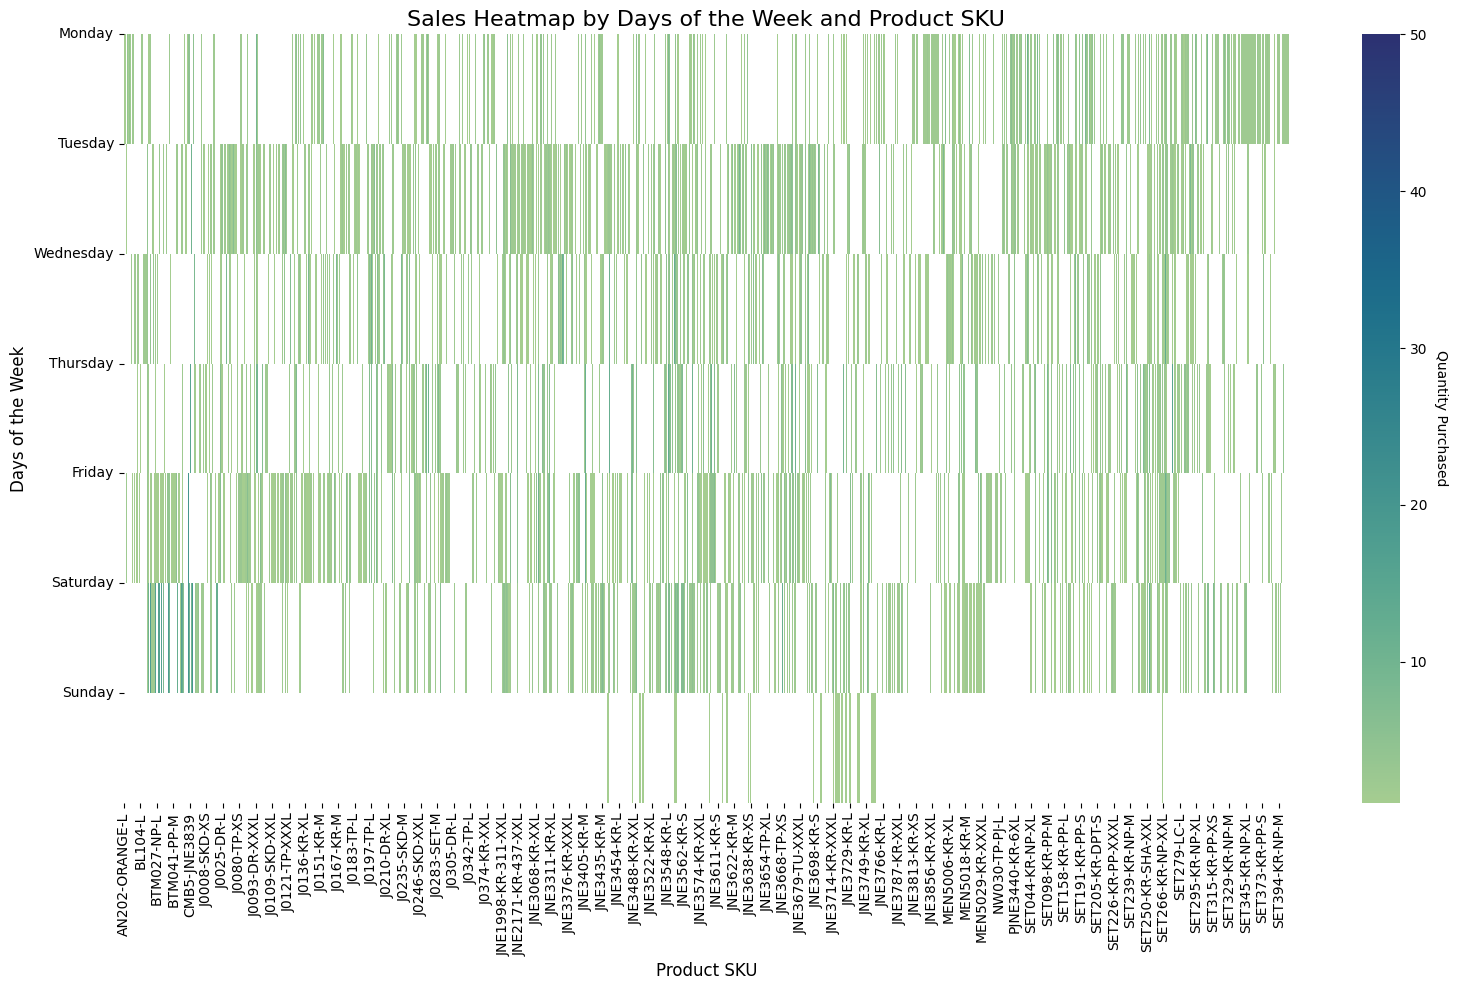

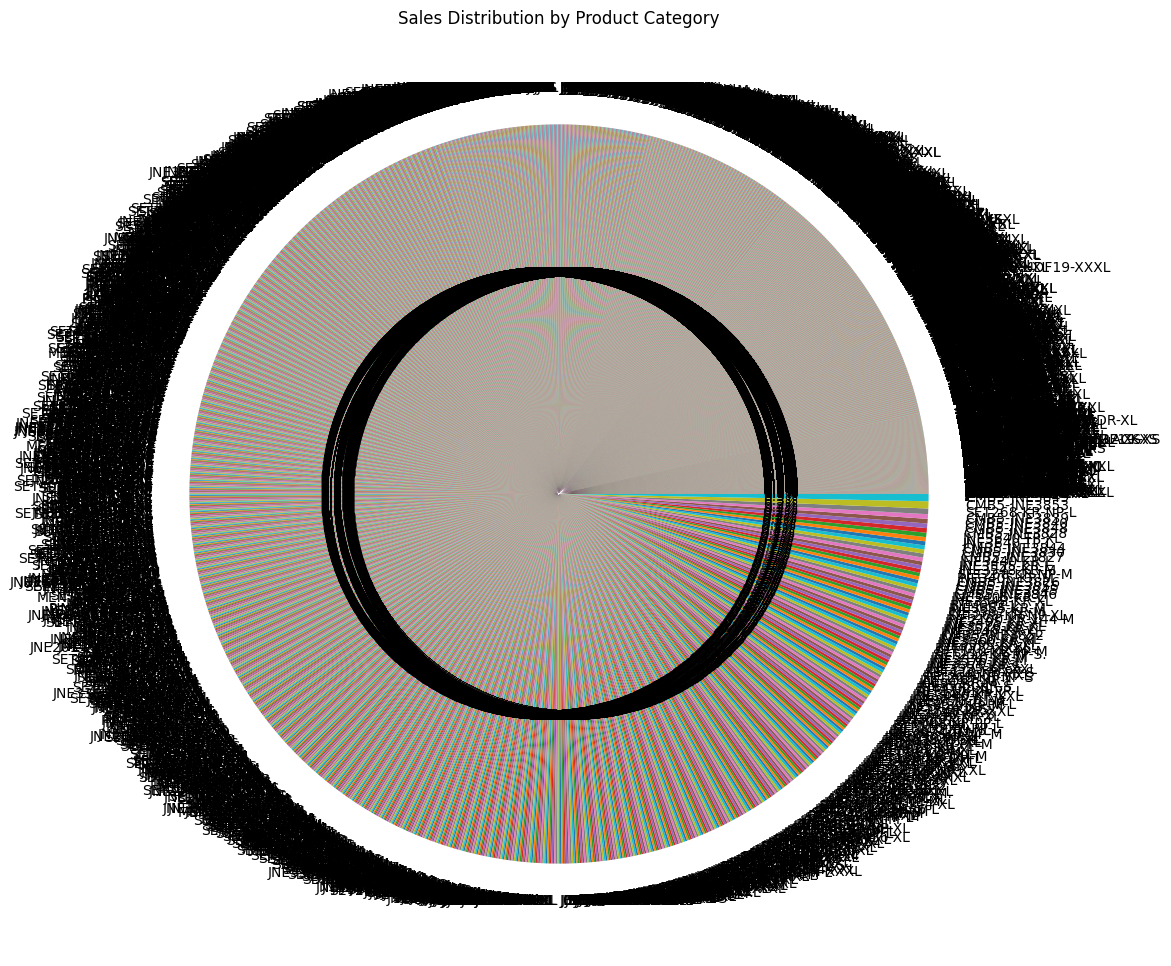

Total sales: $15,768,162.19
Average order value: $846.16
Best selling month: 2021-10 ($2,865,134.00)
Worst selling month: 2022-05 ($224,483.44)


In [ ]:
# Sales Trend Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='Sale_Date', y='Gross_Amount', data=sales_data)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Gross Amount')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Weekly Sales Trend
weekly_sales = sales_data.resample('W', on='Sale_Date').sum(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekly_sales.index, y=weekly_sales['Gross_Amount'])
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Gross Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Customer Analysis
top_customers = sales_data.groupby('Customer_Name')['Gross_Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title('Top 10 Customers by Gross Amount')
plt.xlabel('Gross Amount')
plt.ylabel('Customer Name')
plt.show()

# Size Distribution
size_distribution = sales_data.groupby('Product_Size')['Quantity_Purchased'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=size_distribution.index, y=size_distribution.values)
plt.title('Size Distribution')
plt.xlabel('Product Size')
plt.ylabel('Quantity Purchased')
plt.show()

# Sales Heatmap by Day of Week and Product_SKU
pivot = sales_data.pivot_table(values='Quantity_Purchased', index=pd.to_datetime(sales_data['Sale_Date'],format='%d-%m-%Y').dt.dayofweek, columns='Product_SKU', aggfunc='sum')
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(pivot, cmap='crest', annot=False)
plt.title('Sales Heatmap by Days of the Week and Product SKU', fontsize=16)
plt.xlabel('Product SKU', fontsize=12)
plt.ylabel('Days of the Week', fontsize=12)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.yticks(range(7), day_names, rotation=0)
plt.xticks(rotation=90)
cbar = heatmap.collections[0].colorbar
cbar.set_label('Quantity Purchased', rotation=270, labelpad=15)
plt.tight_layout()
plt.show()

# Sales Distribution by Product Category(SKU)
plt.figure(figsize=(20, 12))
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales Distribution by Product Category')
plt.show()

# Additional Insights
monthly_sales = sales_data.groupby('Sale_Month')['Gross_Amount'].sum()
print(f"Total sales: ${sales_data['Gross_Amount'].sum():,.2f}")
print(f"Average order value: ${sales_data['Gross_Amount'].mean():,.2f}")
print(f"Best selling month: {monthly_sales.idxmax()} (${monthly_sales.max():,.2f})")
print(f"Worst selling month: {monthly_sales.idxmin()} (${monthly_sales.min():,.2f})")

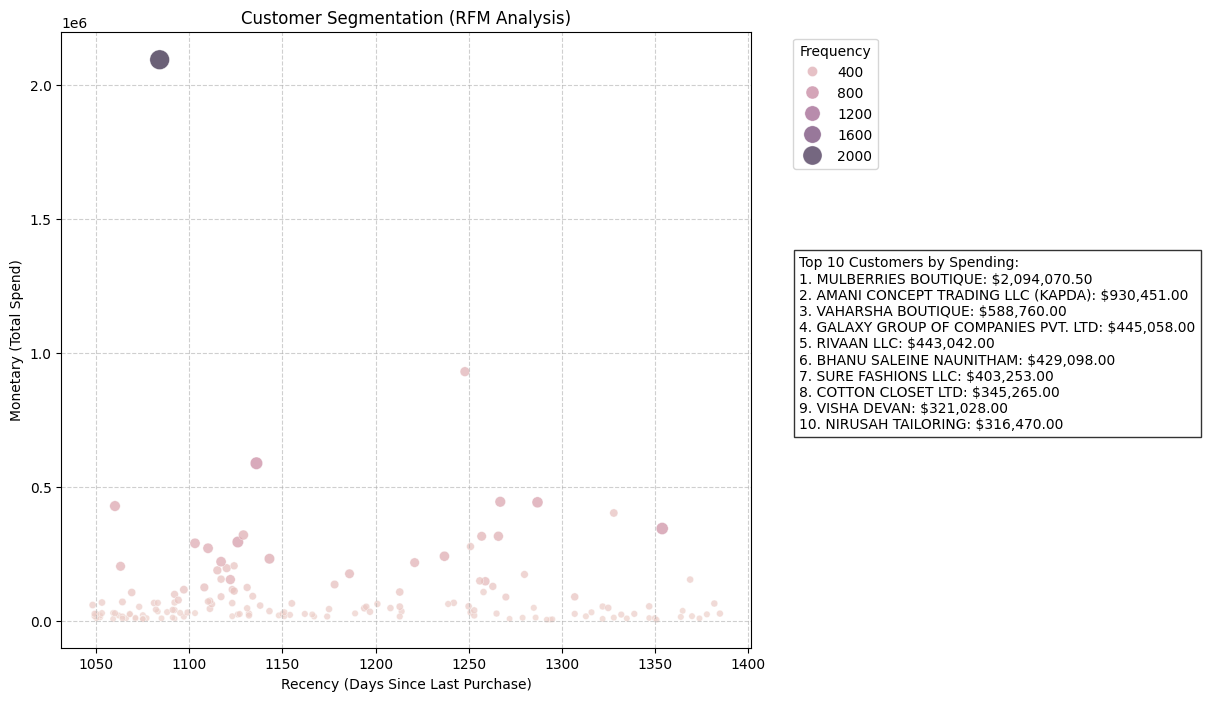

In [ ]:
# Compute RFM metrics
rfm = sales_data.groupby('Customer_Name').agg({
    'Sale_Date': lambda x: (pd.to_datetime('today') - pd.to_datetime(x.max())).days,  # Recency
    'Customer_Name': 'count',  # Frequency
    'Gross_Amount': 'sum'  # Monetary
}).rename(columns={'Sale_Date': 'Recency', 'Customer_Name': 'Frequency', 'Gross_Amount': 'Monetary'})

rfm['Recency'] = rfm['Recency'].astype(int)

# Identify Top 10 Customers by Monetary Value (Spending)
top_customers = rfm.sort_values(by='Monetary', ascending=False).head(10)

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Scatter
scatter = sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Frequency', size='Frequency', sizes=(20, 200), alpha=0.7, ax=ax)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.6)

# Titles and Labels
ax.set_title("Customer Segmentation (RFM Analysis)")
ax.set_xlabel("Recency (Days Since Last Purchase)")
ax.set_ylabel("Monetary (Total Spend)")

# Move the legend outside the plot
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, title="Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')

# Create a second text box below the legend
top_text = "\n".join([f"{i+1}. {name}: ${value:,.2f}" for i, (name, value) in enumerate(top_customers['Monetary'].items())])

# Adjust y-position to align it just below the legend
fig.text(0.74, 0.6, f"Top 10 Customers by Spending:\n{top_text}", 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8), va='top')

# Adjust layout to make space for the legend and text box
plt.subplots_adjust(right=0.7)

# Show the plot
plt.show()

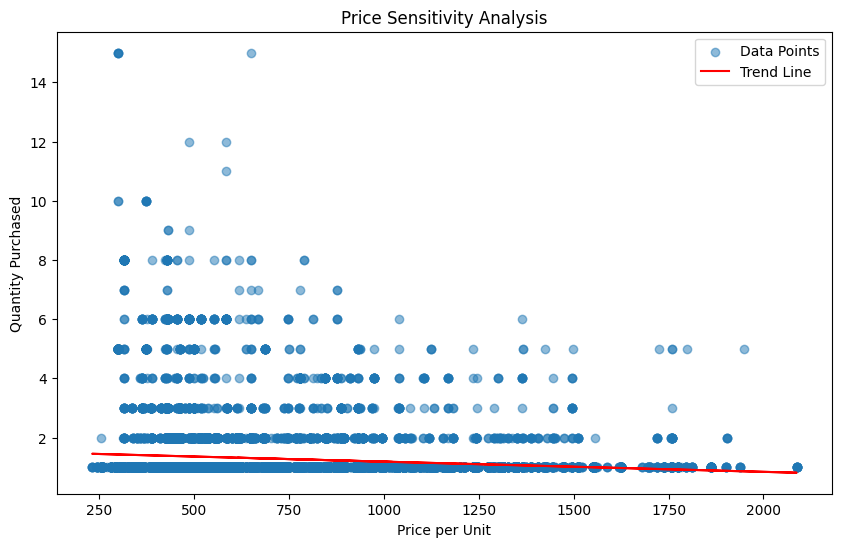

In [51]:
x = sales_data['Price_per_Unit']
y = sales_data['Quantity_Purchased']
# Fit a linear regression model (y = mx + c)
m, c = np.polyfit(x, y, 1)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label="Data Points")
plt.plot(x, m*x + c, color='red', label="Trend Line")  # Plot the fitted line
plt.title("Price Sensitivity Analysis")
plt.xlabel("Price per Unit")
plt.ylabel("Quantity Purchased")
plt.legend()
plt.show()

May-2022

In [ ]:
may_df.head()

,index,Product_SKU,Product_Style_ID,Product_Catalog,Product_Category,Product_Weight,Transfer_Price,Old_MRP,Final_Old_MRP,Ajio_MRP,Amazon_MRP,Amazon_FBA_MRP,Flipkart_MRP,Limeroad_MRP,Myntra_MRP,Paytm_MRP,Snapdeal_MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


P L March

In [19]:
pl_df.head()

,index,Product_SKU,Product_Style_ID,Product_Catalog,Product_Category,Product_Weight,Transfer_Price_Level_1,Transfer_Price_Level_2,Old_MRP,Final_Old_MRP,Ajio_MRP,Amazon_MRP,Amazon_FBA_MRP,Flipkart_MRP,Limeroad_MRP,Myntra_MRP,Paytm_MRP\n,Snapdeal_MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


Sale Report

In [20]:
sales_df.head()

,index,Product_SKU,Design_Number,Stock_Level,Product_Category,Product_Size,Product_Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
